## CNN on Fashion MNIST

In [1]:
# import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

### Data Loading

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

print('train_x.shape:', train_x.shape)
print('train_y.shape:', train_y.shape)
print('test_x.shape:', test_x.shape)
print('test_y.shape:', test_y.shape)

4422102/4422102 [==============================] - 1s 0us/step
train_x.shape: (60000, 28, 28)
train_y.shape: (60000,)
test_x.shape: (10000, 28, 28)
test_y.shape: (10000,)


In [3]:
# labeling
labels = ['T-shirt/top',    # Index 0
          'Trouser',        # Index 1
          'Pullover',       # Index 2
          'Dress',
          'Coat',
          'Sandal',
          'Shirt',
          'Sneaker',
          'Bag',
          'Ankle boot']
print(labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


id = 7563
This Picture is Dress.


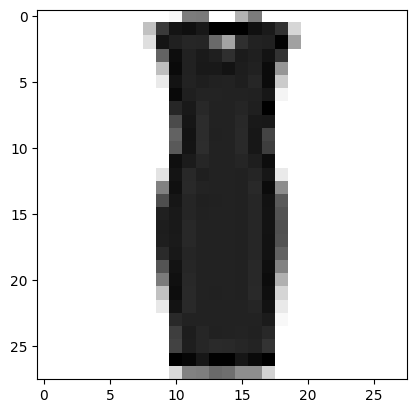

In [4]:
# Check Data -> Use Ctrl + Enter
id = rd.randrange(0, 10000)

print(f'id = {id}')
print(f'This Picture is {labels[test_y[id]]}.')

plt.imshow(test_x[id], cmap='Greys')
plt.show()

### Preprocessing

**Min-Max Scaling**

In [5]:
n_min, n_max = train_x.min(), train_x.max()

print(n_min, n_max)

0 255


In [6]:
train_x = (train_x - n_min) / (n_max - n_min)
test_x = (test_x - n_min) / (n_max - n_min)

In [7]:
print(train_x.max(), train_x.min())

1.0 0.0


**Reshape**

In [8]:
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

print('train_x.shape:', train_x.shape)
print('test_x.shape:', test_x.shape)

train_x.shape: (60000, 28, 28, 1)
test_x.shape: (10000, 28, 28, 1)


**One-Hot Encoding**

In [9]:
from tensorflow.keras.utils import to_categorical

n_class = len(np.unique(train_y))

train_y = to_categorical(train_y, n_class)
test_y = to_categorical(test_y, n_class)

In [10]:
print('train_y.shape:', train_y.shape)
print('test_y.shape:', test_y.shape)

train_y.shape: (60000, 10)
test_y.shape: (10000, 10)


### Modeling

In [11]:
# Import Library

from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.backend import clear_session

In [12]:
# Session Clear
clear_session

# Layer
X = Input(shape=(28, 28, 1))

H = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(X)
H = BatchNormalization()(H)
H = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(H)
H = BatchNormalization()(H)
H = MaxPool2D(pool_size=(2,2), strides=(2,2))(H)
H = Dropout(0.25)(H)

H = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(H)
H = BatchNormalization()(H)
H = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(H)
H = BatchNormalization()(H)
H = MaxPool2D(pool_size=(2,2), strides=(2,2))(H)
H = Dropout(0.25)(H)

H = Flatten()(H)
H = Dense(512, activation='relu')(H)
H = BatchNormalization()(H)

Y = Dense(10, activation='softmax')(H)

# Weave Model
model = Model(X, Y)

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0     

**Early Stopping**

In [12]:
early = EarlyStopping(monitor='val_loss',
                      min_delta=0,
                      patience=5,
                      verbose=1,
                      restore_best_weights=True)

**Fitting**

In [23]:
hist = model.fit(train_x, train_y,
                 validation_split=0.2,
                 epochs=100000,
                 callbacks=[early])

Epoch 1/100000
1500/1500 [==============================] - 25s 8ms/step - loss: 0.4186 - accuracy: 0.8519 - val_loss: 0.3126 - val_accuracy: 0.8887
Epoch 2/100000
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2819 - accuracy: 0.8971 - val_loss: 0.2839 - val_accuracy: 0.9001
Epoch 3/100000
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2439 - accuracy: 0.9106 - val_loss: 0.2422 - val_accuracy: 0.9104
Epoch 4/100000
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2201 - accuracy: 0.9186 - val_loss: 0.2628 - val_accuracy: 0.9040
Epoch 5/100000
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2037 - accuracy: 0.9250 - val_loss: 0.2155 - val_accuracy: 0.9200
Epoch 6/100000
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1786 - accuracy: 0.9339 - val_loss: 0.2064 - val_accuracy: 0.9247
Epoch 7/100000
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1586 - accuracy: 0.9411

## Visualization

**Accuracy Plot**

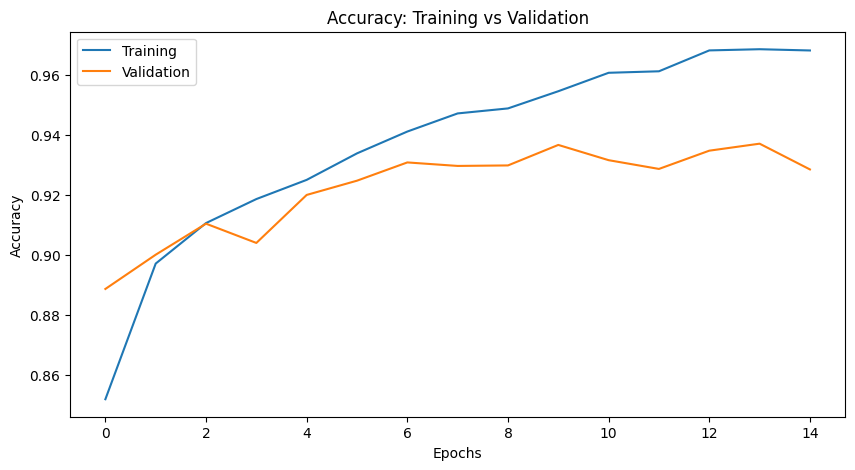

In [24]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(accuracy, label='Training')
plt.plot(val_accuracy, label='Validation')
plt.title('Accuracy: Training vs Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Loss Plot**

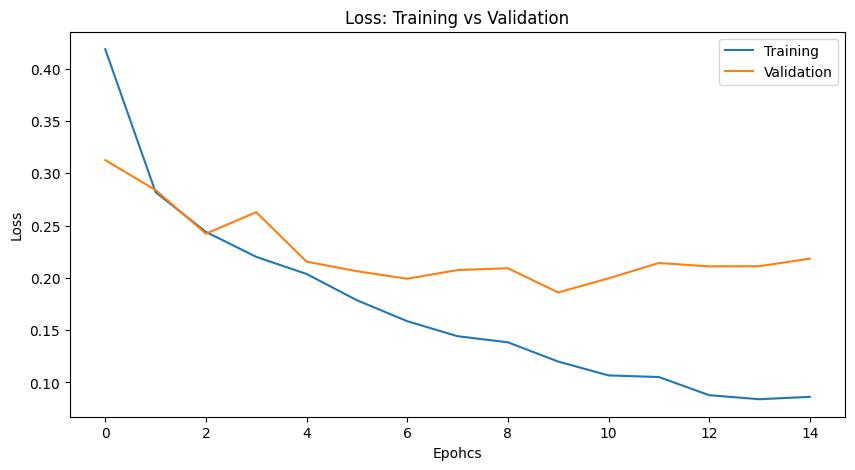

In [26]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.figure(figsize=(10, 5))
plt.plot(loss, label='Training')
plt.plot(val_loss, label='Validation')
plt.title('Loss: Training vs Validation')
plt.xlabel('Epohcs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
# save model

model.save('/content/drive/MyDrive/kt_aivle/개인_공부용/model_1_3.h5')

In [14]:
# load model
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/kt_aivle/개인_공부용/model_1_3.h5')

## Evaluate

In [15]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 8s 4ms/step - loss: 0.2085 - accuracy: 0.9325


[0.20849211513996124, 0.9325000047683716]

In [16]:
y_pred = model.predict(test_x)
y_pred.shape

313/313 [==============================] - 1s 4ms/step


(10000, 10)

**Reshape**
- 10 -> 1

In [17]:
single_y_pred = y_pred.argmax(axis=1)
single_y_pred.shape

(10000,)

In [18]:
print(test_y.shape)
single_test_y = np.argmax(test_y, axis=1)
print(single_test_y.shape)

(10000, 10)
(10000,)


**Accuacy**

In [19]:
from sklearn.metrics import accuracy_score

test_acc = accuracy_score(single_test_y, single_y_pred)
print(f'testset accuracy: {test_acc}')

testset accuracy: 0.9325


**Check Image**

id = 2780
This image is number 8.
Model Prediction: 8
Model's categorical percentage: [[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0. 100.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0. 100.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
correct!


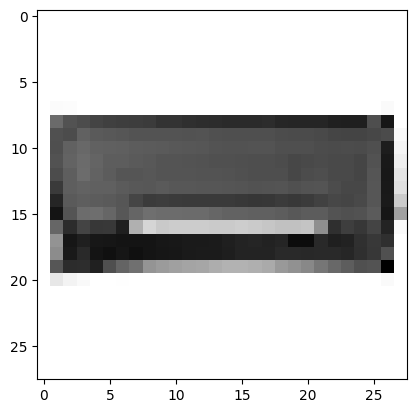

In [24]:
id = rd.randrange(0, 10000)

print(f'id = {id}')
print(f'This image is number {single_test_y[id]}.')
print(f'Model Prediction: {single_y_pred[id]}')
print(f"Model's categorical percentage: {np.floor(y_pred)*100}")

if single_test_y[id] == single_y_pred[id]:
  print('correct!')
else:
  print('Error!')

plt.imshow(test_x[id].reshape(28, -1), cmap='Greys')
plt.show()